In [39]:
#import all the necessary libraries
import pandas as pd
import seaborn as sns
import operator
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [40]:
#load the dataset
covid_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-07-2020.csv")

In [41]:
#take a look at the original dataset
covid_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,1,418.095585,259566.0,2022.0,3.375610,84000001,USA,5293.824320,9.863415
1,Alaska,US,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,2,74.226466,64904.0,NaN,1.841621,84000002,USA,8872.181479,NaN
2,American Samoa,US,2020-06-08 03:33:42,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,174.0,NaN,NaN,16,ASM,312.719038,NaN
3,Arizona,US,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,4,370.793369,281621.0,3352.0,3.894179,84000004,USA,3869.102206,12.419875
4,Arkansas,US,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,5,312.346329,160273.0,844.0,1.633779,84000005,USA,5310.914824,8.953957


In [42]:
#shows the stats for all number cols for all over US states and territories
covid_data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,46.000000,58.000000,58.000000,56.000000,5.600000e+01,36.000000,57.000000,5.800000e+01,56.000000,36.000000
mean,36.840089,-85.206614,33511.155172,1905.603448,11007.978261,22875.086207,3288.086207,503.030831,3.613514e+05,6025.166667,5.335873,7.676194e+07,6149.700645,13.106761
std,10.887035,49.754449,58159.923465,4420.358896,15524.819889,46033.001756,17408.350591,448.274561,4.912219e+05,14975.688469,9.005992,2.378302e+07,2925.659743,4.397443
min,-14.271000,-170.132000,0.000000,0.000000,19.000000,-11.000000,1.000000,0.000000,1.740000e+02,69.000000,0.000000,1.600000e+01,169.938856,5.924413
25%,34.594600,-101.165775,3519.750000,87.750000,1364.750000,662.000000,18.250000,188.566002,6.797375e+04,837.750000,2.793296,8.400001e+07,4421.405434,9.618637
50%,39.061850,-87.944200,14654.500000,479.500000,4926.000000,7347.500000,32.500000,364.316703,2.254475e+05,1977.000000,4.003219,8.400003e+07,5683.285670,12.540213
75%,42.361650,-76.970625,38206.250000,1762.500000,12452.500000,20389.500000,47.750000,617.071160,4.089572e+05,6226.250000,5.240034,8.400004e+07,7163.272298,16.422371
max,61.370700,145.673900,378097.000000,30374.000000,67544.000000,280179.000000,99999.000000,1943.587603,2.497842e+06,89995.000000,70.370370,8.410000e+07,16117.168746,23.802093


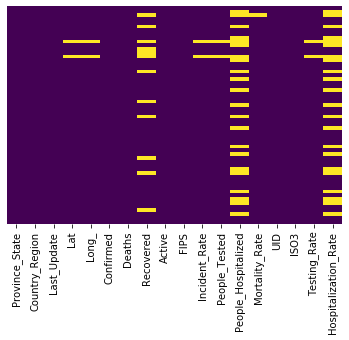

In [43]:
#get an idea of how many missing values we have in our dataframe
sns.heatmap(covid_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [44]:
#there are extra cols, let's remove them and put them in a new dataset so we are not modifying the original one
#in case we need that back in the future
covid_modified = covid_data.drop(columns=['Last_Update', 'Lat', 'Long_', 'Country_Region', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate'])

In [45]:
#let's take a look at this new one now
#this will give you a list of total confirmed, deaths and recovered cases listed by the US states and cruise ships
covid_modified

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,20500,692,11395.0
1,Alaska,543,10,382.0
2,American Samoa,0,0,NaN
3,Arizona,26989,1051,5517.0
4,Arkansas,9426,154,6424.0
5,California,130615,4632,NaN
6,Colorado,27987,1527,4074.0
7,Connecticut,43968,4071,7284.0
8,Delaware,9942,398,5792.0
9,Diamond Princess,49,0,NaN


In [46]:
#shows the stats for confirmed, deaths and recovered all over US states and territories
covid_modified.describe()

,Confirmed,Deaths,Recovered
count,58.000000,58.000000,46.000000
mean,33511.155172,1905.603448,11007.978261
std,58159.923465,4420.358896,15524.819889
min,0.000000,0.000000,19.000000
25%,3519.750000,87.750000,1364.750000
50%,14654.500000,479.500000,4926.000000
75%,38206.250000,1762.500000,12452.500000
max,378097.000000,30374.000000,67544.000000


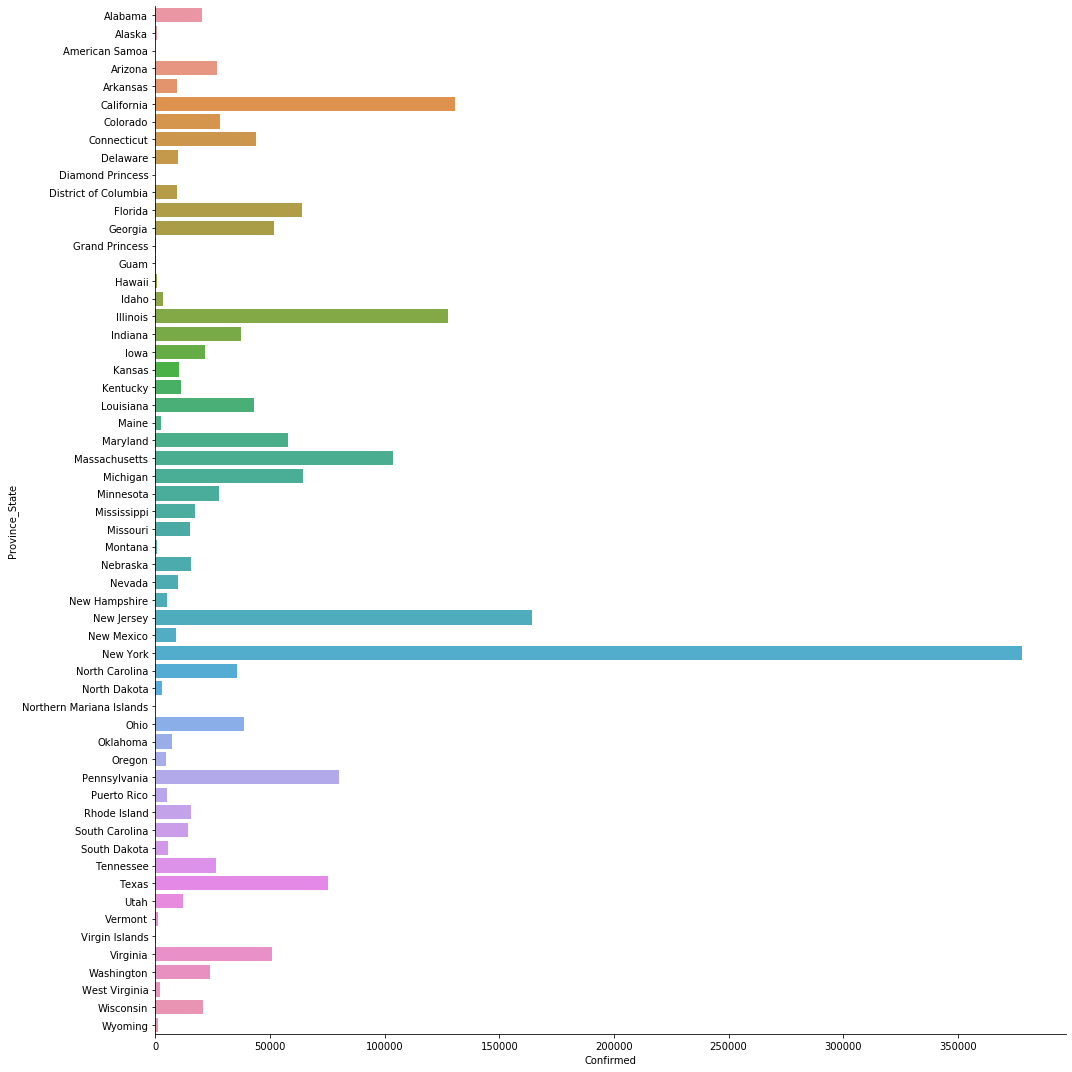

In [47]:
#since the previous list can be a bit tedious to read, let's present it in a way that is easier to read
sns.catplot(x='Confirmed',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)

#the same can be viewed for deaths and recovered cases, below is the code for that
#sns.catplot(x='Deaths',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)
#sns.catplot(x='Recovered',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)


In [48]:
#the last representation was a bit better and it was clear to see the New York topped the list.
#but what if you want to see the top 5 to top 10? Would the previous plot suffice? Probably not.
#so let's look at another way of presenting the list in a decreasing order.

provinces =  list(covid_modified['Province_State'])
confirmed = []
no_cases = [] 

for i in provinces:
    cases = covid_modified[covid_modified['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed.append(cases)
    else:
        no_cases.append(i)
    
# remove areas with no confirmed cases
for i in no_cases:
    provinces.remove(i)
    
provinces = [k for k, v in sorted(zip(provinces, confirmed), key=operator.itemgetter(1), reverse=True)]
for i in range(len(provinces)):
    confirmed[i] = covid_modified[covid_modified['Province_State']==provinces[i]]['Confirmed'].sum()


In [49]:
province_df = pd.DataFrame({'Province/State Name': provinces,'Number of Confirmed Cases': confirmed})

province_df.style.background_gradient(cmap='Blues')

,Province/State Name,Number of Confirmed Cases
0,New York,378097
1,New Jersey,164164
2,California,130615
3,Illinois,127757
4,Massachusetts,103436
5,Pennsylvania,79908
6,Texas,75408
7,Michigan,64413
8,Florida,63938
9,Maryland,57973


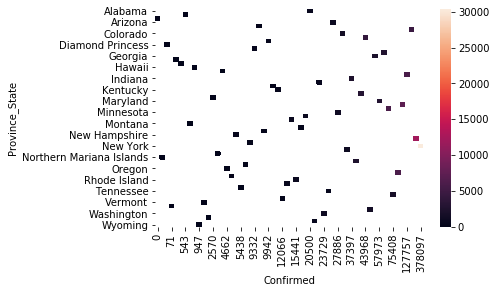

In [50]:
#another interested representation is a heatmap where it shows the deaths and confirmed cases by the states
#heatmap has the data in a matrix form
virus = covid_modified.pivot_table(values='Deaths',index='Province_State',columns='Confirmed')
sns.heatmap(virus)

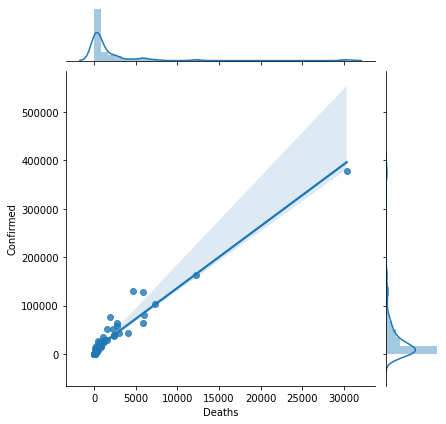

In [51]:
#grids can also be helpful way of representation
g = sns.JointGrid(x="Deaths", y="Confirmed", data=covid_modified)
g = g.plot(sns.regplot, sns.distplot)

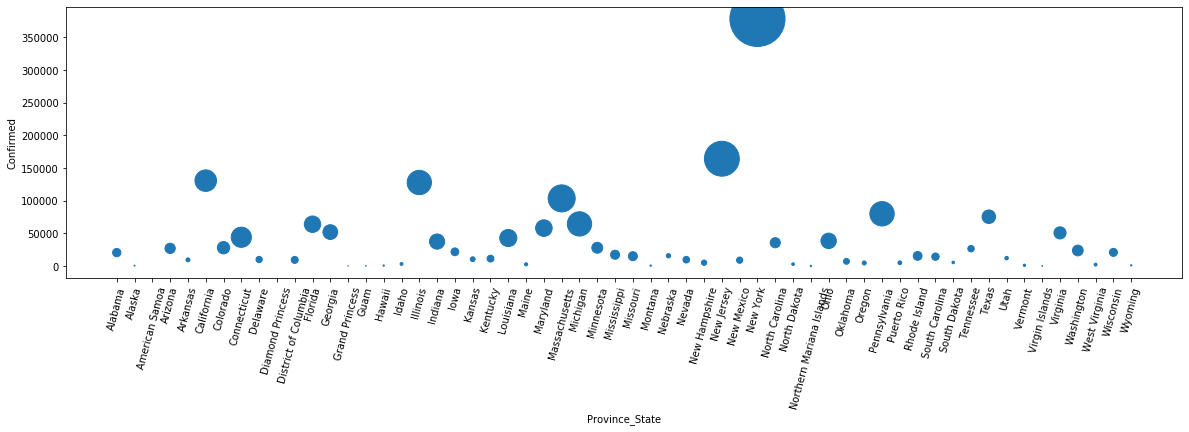

In [52]:
#shows a 3-dimensional plot, there's x vs y and the color value for size

covid_modified.plot.scatter(x="Province_State", y="Confirmed", s=covid_modified['Deaths']/10, figsize=(20, 5), rot=75)

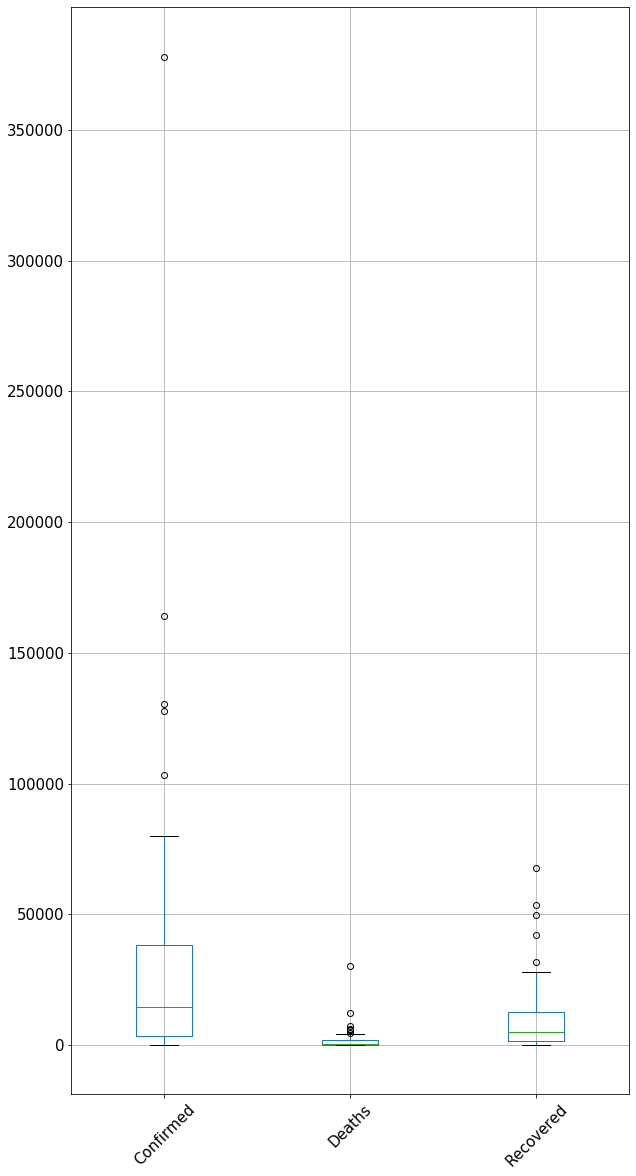

In [53]:
#takes every col as cat and plots distribution as a box plot
#shows total confirmed, deaths and recovered in US states
covid_modified.plot.box(grid=True, rot=45, fontsize=15,figsize=(10, 20))

In [54]:
covid_modified

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,20500,692,11395.0
1,Alaska,543,10,382.0
2,American Samoa,0,0,NaN
3,Arizona,26989,1051,5517.0
4,Arkansas,9426,154,6424.0
5,California,130615,4632,NaN
6,Colorado,27987,1527,4074.0
7,Connecticut,43968,4071,7284.0
8,Delaware,9942,398,5792.0
9,Diamond Princess,49,0,NaN


In [55]:

covid_states=covid_modified.drop([2, 9, 10, 13, 14, 39, 44, 52], axis='index')
covid_states


#covid_states=covid_modified.drop(['American Samoa','Diamond Princess', 'District of Columbia', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico'], axis='Province_State')

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,20500,692,11395.0
1,Alaska,543,10,382.0
3,Arizona,26989,1051,5517.0
4,Arkansas,9426,154,6424.0
5,California,130615,4632,NaN
6,Colorado,27987,1527,4074.0
7,Connecticut,43968,4071,7284.0
8,Delaware,9942,398,5792.0
11,Florida,63938,2700,NaN
12,Georgia,51898,2180,NaN


In [56]:
#shows the stats for confirmed, deaths and recovered all over US states
covid_states.describe()

,Confirmed,Deaths,Recovered
count,50.000000,50.000000,42.000000
mean,38578.020000,2197.220000,12023.357143
std,61181.489689,4700.681598,15886.084249
min,543.000000,10.000000,382.000000
25%,7597.500000,169.000000,2254.500000
50%,18885.000000,669.500000,5886.500000
75%,43680.000000,2272.250000,13736.500000
max,378097.000000,30374.000000,67544.000000


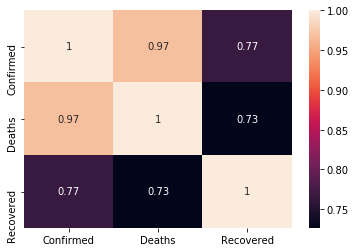

In [57]:
#provides a heatmap between confirmed/deaths/recovered, we can see it's pretty correlated
x = covid_states.corr()
sns.heatmap(x, annot=True)

In [58]:
def convert_state_name(name):
    cd=str(name)
    us_state_abbrev = {
    "Alabama":"AL",
    "Alaska":"AK",
    "Arizona":"AZ",
    "Arkansas":"AR",
    "California":"CA",
    "Colorado":"CO",
    "Connecticut":"CT",
    "Delaware":"DE",
    "Washington DC":"DC",
    "Florida":"FL",
    "Georgia":"GA",
    "Hawaii":"HI",
    "Idaho":"ID",
    "Illinois":"IL",
    "Indiana":"IN",
    "Iowa":"IA",
    "Kansas":"KS",
    "Kentucky":"KY",
    "Louisiana":"LA",
    "Maine":"ME",
    "Maryland":"MD",
    "Massachusetts":"MA",
    "Michigan":"MI",
    "Minnesota":"MN",
    "Mississippi":"MS",
    "Missouri":"MO",
    "Montana":"MT",
    "Nebraska":"NE",
    "Nevada":"NV",
    "New Hampshire":"NH",
    "New Jersey":"NJ",
    "New Mexico":"NM",
    "New York":"NY",
    "North Carolina":"NC",
    "North Dakota":"ND",
    "Ohio":"OH",
    "Oklahoma":"OK",
    "Oregon":"OR",
    "Pennsylvania":"PA",
    "Rhode Island":"RI",
    "South Carolina":"SC",
    "South Dakota":"SD",
    "Tennessee":"TN",
    "Texas":"TX",
    "Utah":"UT",
    "Vermont":"VT",
    "Virginia":"VA",
    "Washington":"WA",
    "West Virginia":"WV",
    "Wisconsin":"WI",
    "Wyoming":"WY"}
    return us_state_abbrev[cd]

covid_states['STATE_CD'] = covid_states.Province_State.apply(lambda x:convert_state_name(x)) 

In [59]:
covid_states

,Province_State,Confirmed,Deaths,Recovered,STATE_CD
0,Alabama,20500,692,11395.0,AL
1,Alaska,543,10,382.0,AK
3,Arizona,26989,1051,5517.0,AZ
4,Arkansas,9426,154,6424.0,AR
5,California,130615,4632,NaN,CA
6,Colorado,27987,1527,4074.0,CO
7,Connecticut,43968,4071,7284.0,CT
8,Delaware,9942,398,5792.0,DE
11,Florida,63938,2700,NaN,FL
12,Georgia,51898,2180,NaN,GA


In [60]:
data = dict(type='choropleth',
            colorscale='Viridis',
            reversescale= True,
            locations = covid_states['STATE_CD'],
            z = covid_states['Confirmed'],
            locationmode = 'USA-states',
            text = covid_states['Province_State'],
            marker = dict(line = dict(color = 'rgb(12,12,12)',width = 2)),
            colorbar = {'title':"COVID"}
            ) 

In [61]:
layout = dict(title = 'COVID-19 Confirmed Cases in US',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [64]:
#this should return an interactive map of US with for confirmed cases
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)
#the output does not show up because of how jupyter notebooks work on Git, so I have uploaded
# a photo of the output under the repo, named 'choromap_fig'.